# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [1]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

# Create a new dataframe from your CSV
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [2]:
# Print out any information you need to understand your dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

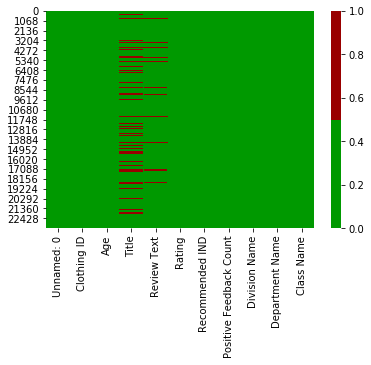

In [3]:
# Plot a heatmap of any missing data
colours = ['#009900', '#990000']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

In [4]:
# Try out a missing data percentage list! 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

Unnamed: 0 - 0.0%
Clothing ID - 0.0%
Age - 0.0%
Title - 16.2224303841%
Review Text - 3.59788810355%
Rating - 0.0%
Recommended IND - 0.0%
Positive Feedback Count - 0.0%
Division Name - 0.0596099804139%
Department Name - 0.0596099804139%
Class Name - 0.0596099804139%


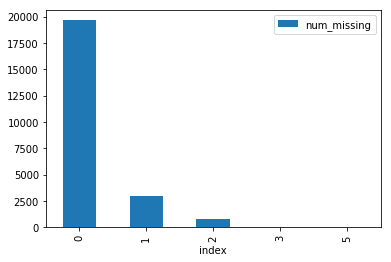

In [5]:
# Plot a missing data histogram
df_missing = df.copy()
for col in df_missing.columns:
    missing = df_missing[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:
        df_missing['{}_ismissing'.format(col)] = missing
        
ismissing_cols = [col for col in df_missing.columns if 'ismissing' in col]
df_missing['num_missing'] = df_missing[ismissing_cols].sum(axis=1)
df_missing['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [6]:
# Handle any missing data in your dataframe.
df['Title'] = df['Title'].fillna('Untitled')
df['Review Text'] = df['Review Text'].fillna('No Review')
df['Division Name'] = df['Division Name'].fillna('None')
df['Department Name'] = df['Department Name'].fillna('None')
df['Class Name'] = df['Class Name'].fillna('None')

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

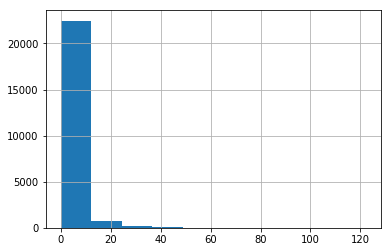

In [7]:
# Plot a histogram to see if there are any outliers.
df['Positive Feedback Count'].hist()

In [8]:
# Use the describe() method
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


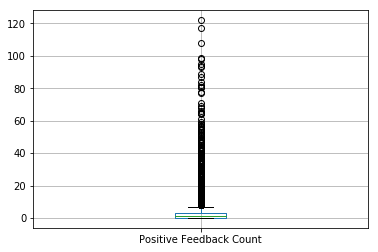

In [9]:
# Plot a bar chart
df.boxplot(column=['Positive Feedback Count'])

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

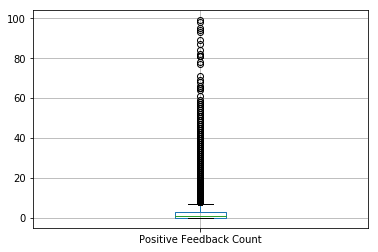

In [10]:
# Handle any outliers in your dataframe
index_outliers = df[df['Positive Feedback Count'] > 100].index
df_minus_outliers = df.drop(index_outliers, axis=0)
df_minus_outliers.boxplot(column=['Positive Feedback Count'])

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [ ]:
# Look for any irrelevant data in the dataframe. How will you handle it?

* **Irrelevant data depends on what the analysis is. What are we trying to figure out here after the data is cleaned?**
* **I'm guessing that 'Title' and 'Review Text' are less useful (unless you're looking at how often certain keywords are mentioned, etc).**

In [11]:
cols_to_drop = ['Title','Review Text']
df_minus_outliers_minus_review = df_minus_outliers.drop(cols_to_drop, axis=1)
df_minus_outliers_minus_review.head()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,5,1,4,General,Dresses,Dresses
2,2,1077,60,3,0,0,General,Dresses,Dresses
3,3,1049,50,5,1,0,General Petite,Bottoms,Pants
4,4,847,47,5,1,6,General,Tops,Blouses


In [12]:
# Look for duplicates. How will you handle any duplicates?
df_dedupped = df_minus_outliers_minus_review.drop('Unnamed: 0', axis=1).drop_duplicates()
print(df_minus_outliers_minus_review.shape)
print(df_dedupped.shape)
df_dedupped.head()

(23483, 9)
(20503, 8)


,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,4,1,0,Initmates,Intimate,Intimates
1,1080,34,5,1,4,General,Dresses,Dresses
2,1077,60,3,0,0,General,Dresses,Dresses
3,1049,50,5,1,0,General Petite,Bottoms,Pants
4,847,47,5,1,6,General,Tops,Blouses


In [13]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?
# Positive Feedback Count may not be informative once the outliers are removed. Column can potentially be removed from the analysis.

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [16]:
# Try to convert all the strings in a column to lower or upper case.
df_dedupped['Division Name'] = df_dedupped['Division Name'].str.replace('\\bInitmates\\b', 'Intimates')
df_dedupped['Department Name'] = df_dedupped['Department Name'].str.lower()
df_dedupped

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,4,1,0,Intimates,intimate,Intimates
1,1080,34,5,1,4,General,dresses,Dresses
2,1077,60,3,0,0,General,dresses,Dresses
3,1049,50,5,1,0,General Petite,bottoms,Pants
4,847,47,5,1,6,General,tops,Blouses
5,1080,49,2,0,4,General,dresses,Dresses
6,858,39,5,1,1,General Petite,tops,Knits
7,858,39,4,1,4,General Petite,tops,Knits
8,1077,24,5,1,0,General,dresses,Dresses
9,1077,34,5,1,0,General,dresses,Dresses
